In [ ]:
### Singapore Race Clustering and Best feature Extraction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [21]:
df_analysis=pd.read_csv('./intermediate_files/df_analysis.csv',index_col=0)

In [50]:
df_analysis.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win'],
      dtype='object')

In [22]:
X = df_analysis.iloc[:,:-1]
y = df_analysis.iloc[:,-1]

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=300)
reduced_tsne = tsne.fit_transform(df_analysis.iloc[:,:-1])

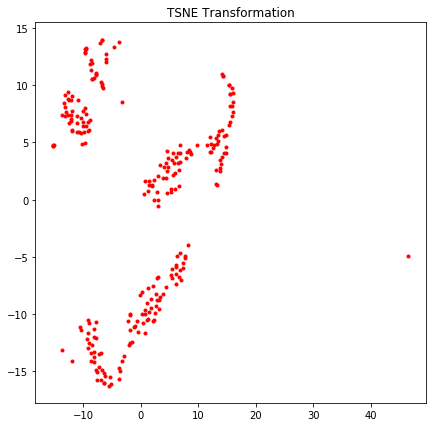

In [24]:
# plotting the clusters TSNE
plt.figure(figsize=(7,7))
plt.plot(reduced_tsne[:,0], reduced_tsne[:,1], 'r.')
plt.title('TSNE Transformation')
plt.show()

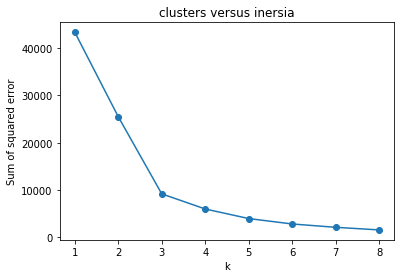

In [25]:
from sklearn.cluster import KMeans

k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(reduced_tsne)
    ssd.append(kmeans.inertia_)
    
plt.plot(k,ssd,'o-')
plt.title("clusters versus inersia")
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [26]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(reduced_tsne)
kmeans_preds=kmeans.predict(reduced_tsne)

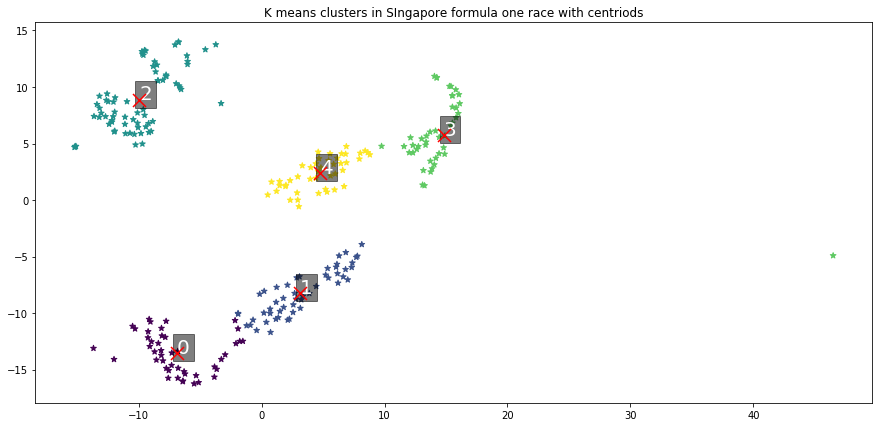

In [27]:
centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(15,7))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', 
             bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(reduced_tsne[:,0],reduced_tsne[:,1],c=kmeans_preds,marker='*')
plt.title("K means clusters in SIngapore formula one race with centriods")

plt.show()

In [28]:
data1=pd.concat([df_analysis.reset_index(drop=True), pd.DataFrame(kmeans_preds, columns=['clusters'])],axis=1)

In [29]:
# extrating individual cluster from the data
cluster1_data = data1[data1['clusters'] == 0]
cluster2_data = data1[data1['clusters'] == 1]
cluster3_data = data1[data1['clusters'] == 2]
cluster4_data = data1[data1['clusters'] == 3]
cluster5_data = data1[data1['clusters'] == 4]
print ('Cluster1 size: ',cluster1_data.shape)
print ('Cluster2 size: ',cluster2_data.shape)
print ('Cluster3 size: ',cluster3_data.shape)
print ('Cluster4 size: ',cluster4_data.shape)
print ('Cluster5 size: ',cluster5_data.shape)

Cluster1 size:  (45, 24)
Cluster2 size:  (51, 24)
Cluster3 size:  (71, 24)
Cluster4 size:  (44, 24)
Cluster5 size:  (44, 24)


End of the analysis

In [30]:
cluster1_data.head(2)

raceId  driverId  D_points  D_wins  race_year  constructorId_x  \
121     893       815      22.0       0       2013                1   
134     913       825      39.0       0       2014                1   

     starting_grid  Ending_position  laps_completed  statusId  ...  \
121             14                8              61         1  ...   
134              9               10              60         1  ...   

     temperatureHigh  temperatureLow  windSpeed  windBearing  humidity  \
121            91.56           79.17       8.46        180.0      0.72   
134            90.22           77.30       5.60        217.0      0.77   

     averagetime_at_pitstop  number    q3  is_win  clusters  
121            29052.500000       6  6285       1         0  
134            28743.666667      20  6375       1         0  

[2 rows x 24 columns]

In [31]:
# Mutual Information computation
# 
from sklearn.feature_selection import mutual_info_classif

# Mutual information for cluster 1
X1 = cluster1_data.iloc[:, :-3]
y1 = cluster1_data.iloc[:, -2]
mi_data_clus1 = mutual_info_classif(X1, y1, 'auto')

In [32]:
# mututal information for cluster 2
X2 = cluster2_data.iloc[:, :-3]
y2 = cluster2_data.iloc[:, -2]
mi_data_clus2 = mutual_info_classif(X2, y2, 'auto')


In [33]:
# mututal information for cluster 3
X3 = cluster3_data.iloc[:, :-3]
y3 = cluster3_data.iloc[:, -2]
mi_data_clus3 = mutual_info_classif(X3, y3, 'auto')
# mututal information for cluster 3
X4 = cluster4_data.iloc[:, :-3]
y4 = cluster4_data.iloc[:, -2]
mi_data_clus4 = mutual_info_classif(X4, y4, 'auto')
# mututal information for cluster 3
X5 = cluster5_data.iloc[:, :-3]
y5 = cluster5_data.iloc[:, -2]
mi_data_clus5 = mutual_info_classif(X5, y5, 'auto')

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 1')

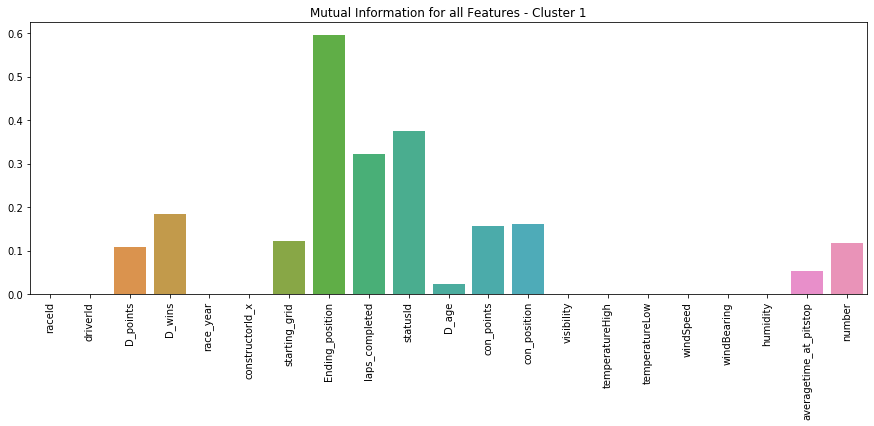

In [34]:
# ploting the result of mutual information
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X1.columns,y=mi_data_clus1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 1")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 2')

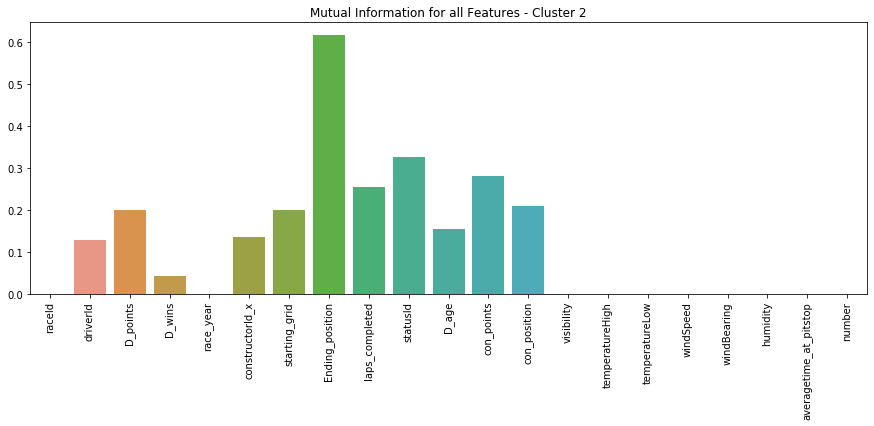

In [35]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X2.columns,y=mi_data_clus2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 2")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 3')

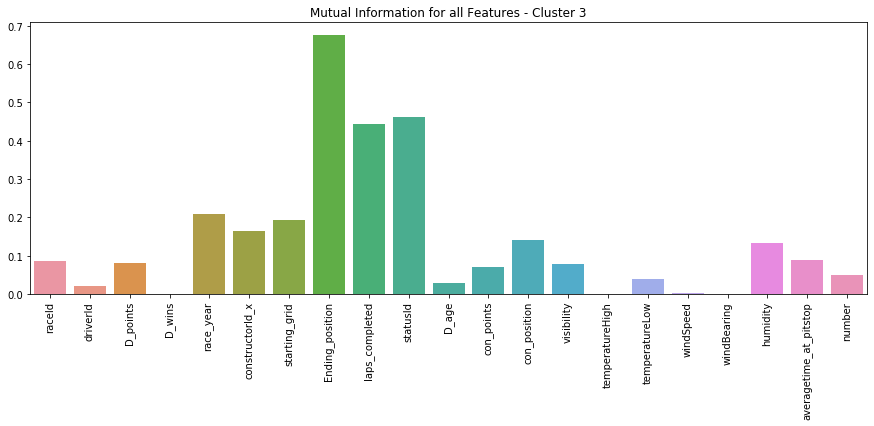

In [36]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X3.columns,y=mi_data_clus3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 3")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 4')

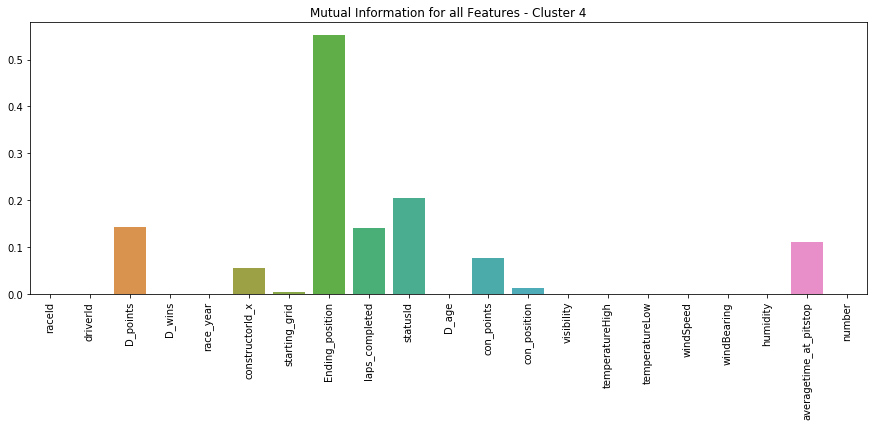

In [37]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X4.columns,y=mi_data_clus4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 4")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 5')

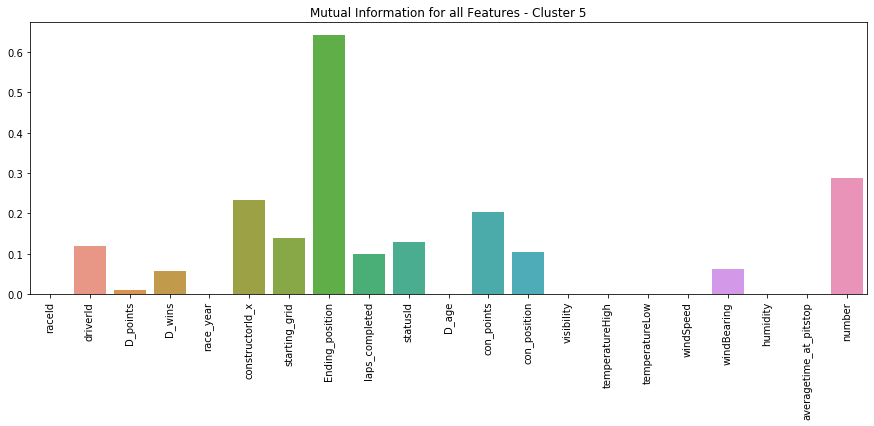

In [38]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X5.columns,y=mi_data_clus5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 5")

In [39]:
### an helper function for extracting the best features possible
def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):
    # this function extracts out the best features.
    # inputs 
    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    # sort the features
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    # extract the best features
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

In [40]:
best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=10)
best_features


array([[0.5518242294971851, 'Ending_position'],
       [0.20460118738777977, 'statusId'],
       [0.14360735571477612, 'D_points'],
       [0.1415739053264069, 'laps_completed'],
       [0.11138432786427788, 'averagetime_at_pitstop'],
       [0.07771862690088649, 'con_points'],
       [0.055954001240593465, 'constructorId_x'],
       [0.013559742855638435, 'con_position'],
       [0.004819031485451264, 'starting_grid'],
       [0.0, 'raceId']], dtype=object)

F-Score

In [41]:
from sklearn.feature_selection import f_classif

Text(0.5, 1.0, 'F score for all Features - Cluster 1')

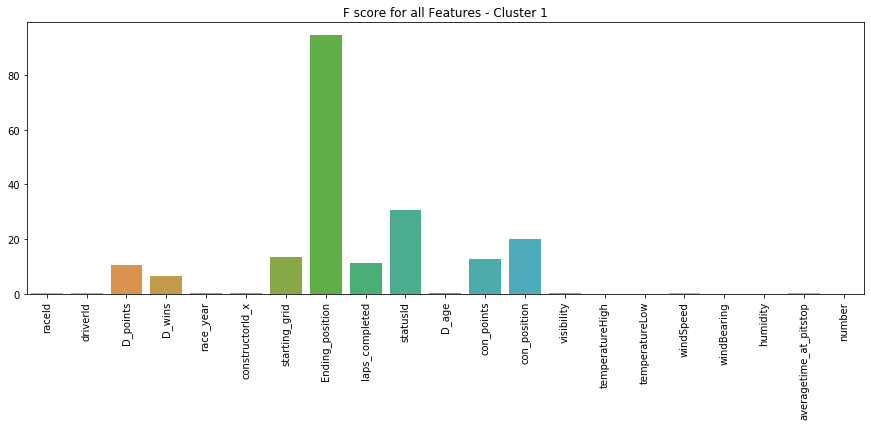

In [42]:

f_test_data = f_classif(X1, y1)
f_score_1=f_test_data[0]

plt.figure(figsize=(15, 5))
g = sns.barplot(x=X1.columns,y=f_score_1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 1")

Text(0.5, 1.0, 'F score for all Features - Cluster 2')

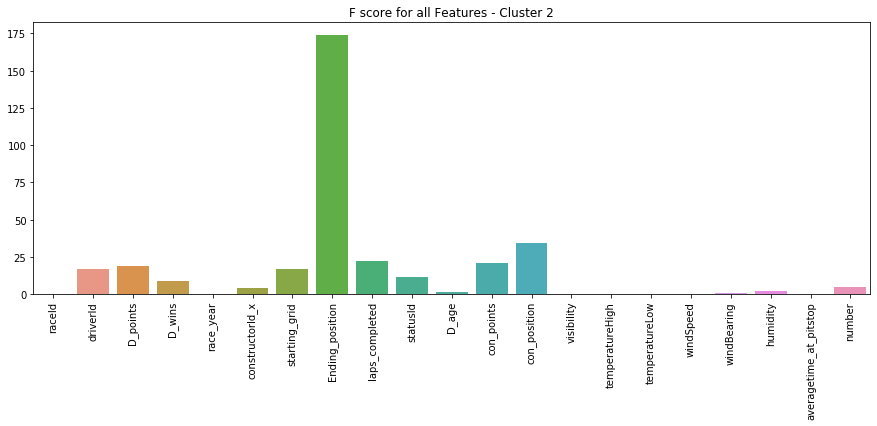

In [43]:
# F-Score for cluster 2
f_test_data = f_classif(X2, y2)
f_score_2=f_test_data[0]

plt.figure(figsize=(15, 5))
g = sns.barplot(x=X2.columns,y=f_score_2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 2")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [19] are constant.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Text(0.5, 1.0, 'F score for all Features - Cluster 3')

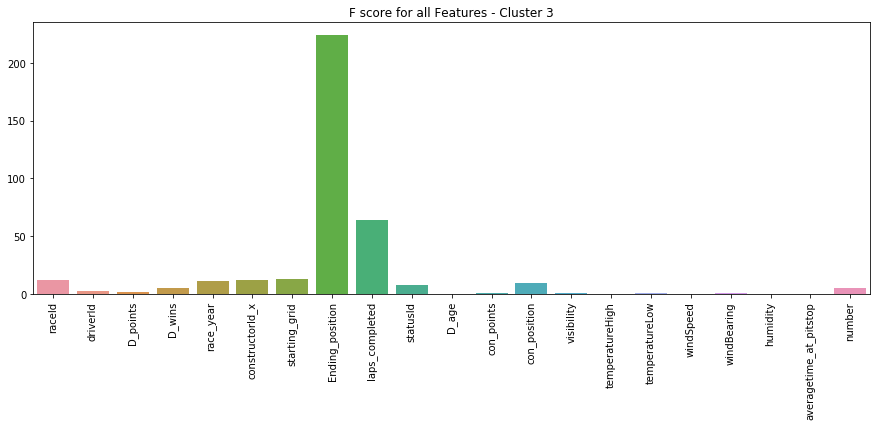

In [44]:
# F-Score for cluster 3
f_test_data = f_classif(X3, y3)
f_score_3=f_test_data[0]

plt.figure(figsize=(15, 5))
g = sns.barplot(x=X3.columns,y=f_score_3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 3")

In [45]:
# F-Score for cluster 4
f_test_data = f_classif(X4, y4)
f_score_4=f_test_data[0]

# F-Score for cluster 5
f_test_data = f_classif(X5, y5)
f_score_5=f_test_data[0]

Text(0.5, 1.0, 'F score for all Features - Cluster 4')

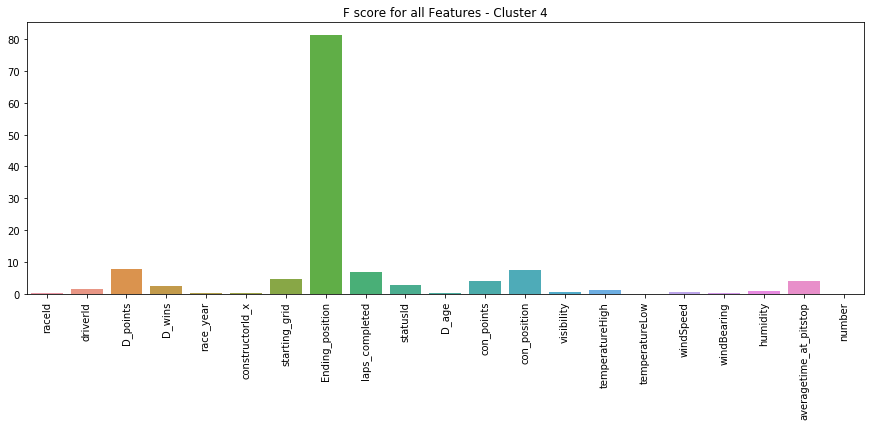

In [46]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X4.columns,y=f_score_4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 4")

Text(0.5, 1.0, 'F score for all Features - Cluster 5')

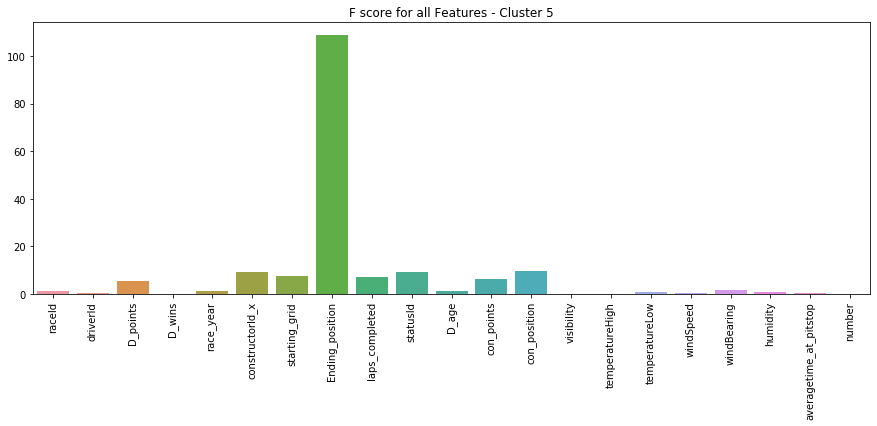

In [47]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X4.columns,y=f_score_5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 5")

In [48]:
best_features = extract_best_features(f_score_1, X1.columns.values, n=10)
best_features

array([[94.45982162470901, 'Ending_position'],
       [30.599932306650867, 'statusId'],
       [20.20578313990817, 'con_position'],
       [13.364790090363558, 'starting_grid'],
       [12.917219975053845, 'con_points'],
       [11.378192410244157, 'laps_completed'],
       [10.476225681031517, 'D_points'],
       [6.506878306878306, 'D_wins'],
       [0.5198640624028346, 'driverId'],
       [0.4961194921808724, 'constructorId_x']], dtype=object)

### Findings:
    As we can see from the above,Ending position and status id are top best feature which helps the predictive power of the model
    

---
---

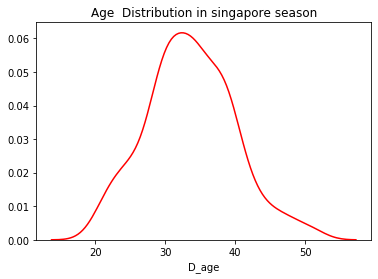

In [51]:
import seaborn as sns
plt.figure()
sns.distplot(df_analysis["D_age"], hist=False, color="r")
plt.title("Age  Distribution in singapore season")
plt.show()
plt.close()

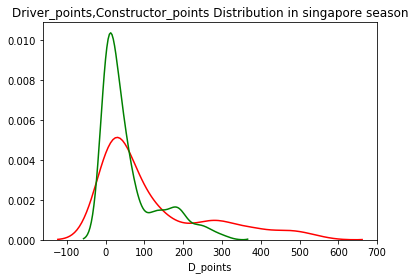

In [52]:
import seaborn as sns
plt.figure()
sns.distplot(df_analysis["con_points"],hist=False, color="r")
sns.distplot(df_analysis["D_points"],hist=False, color="g")
plt.title("Driver_points,Constructor_points Distribution in singapore season")
plt.show()
plt.close()

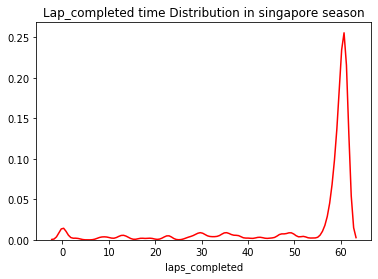

In [53]:
import seaborn as sns
plt.figure()
sns.distplot(df_analysis["laps_completed"],hist=False, color="r")
#sns.distplot(df_analysis["q3"],hist=False, color="g")
plt.title("Lap_completed time Distribution in singapore season")
plt.show()
plt.close()

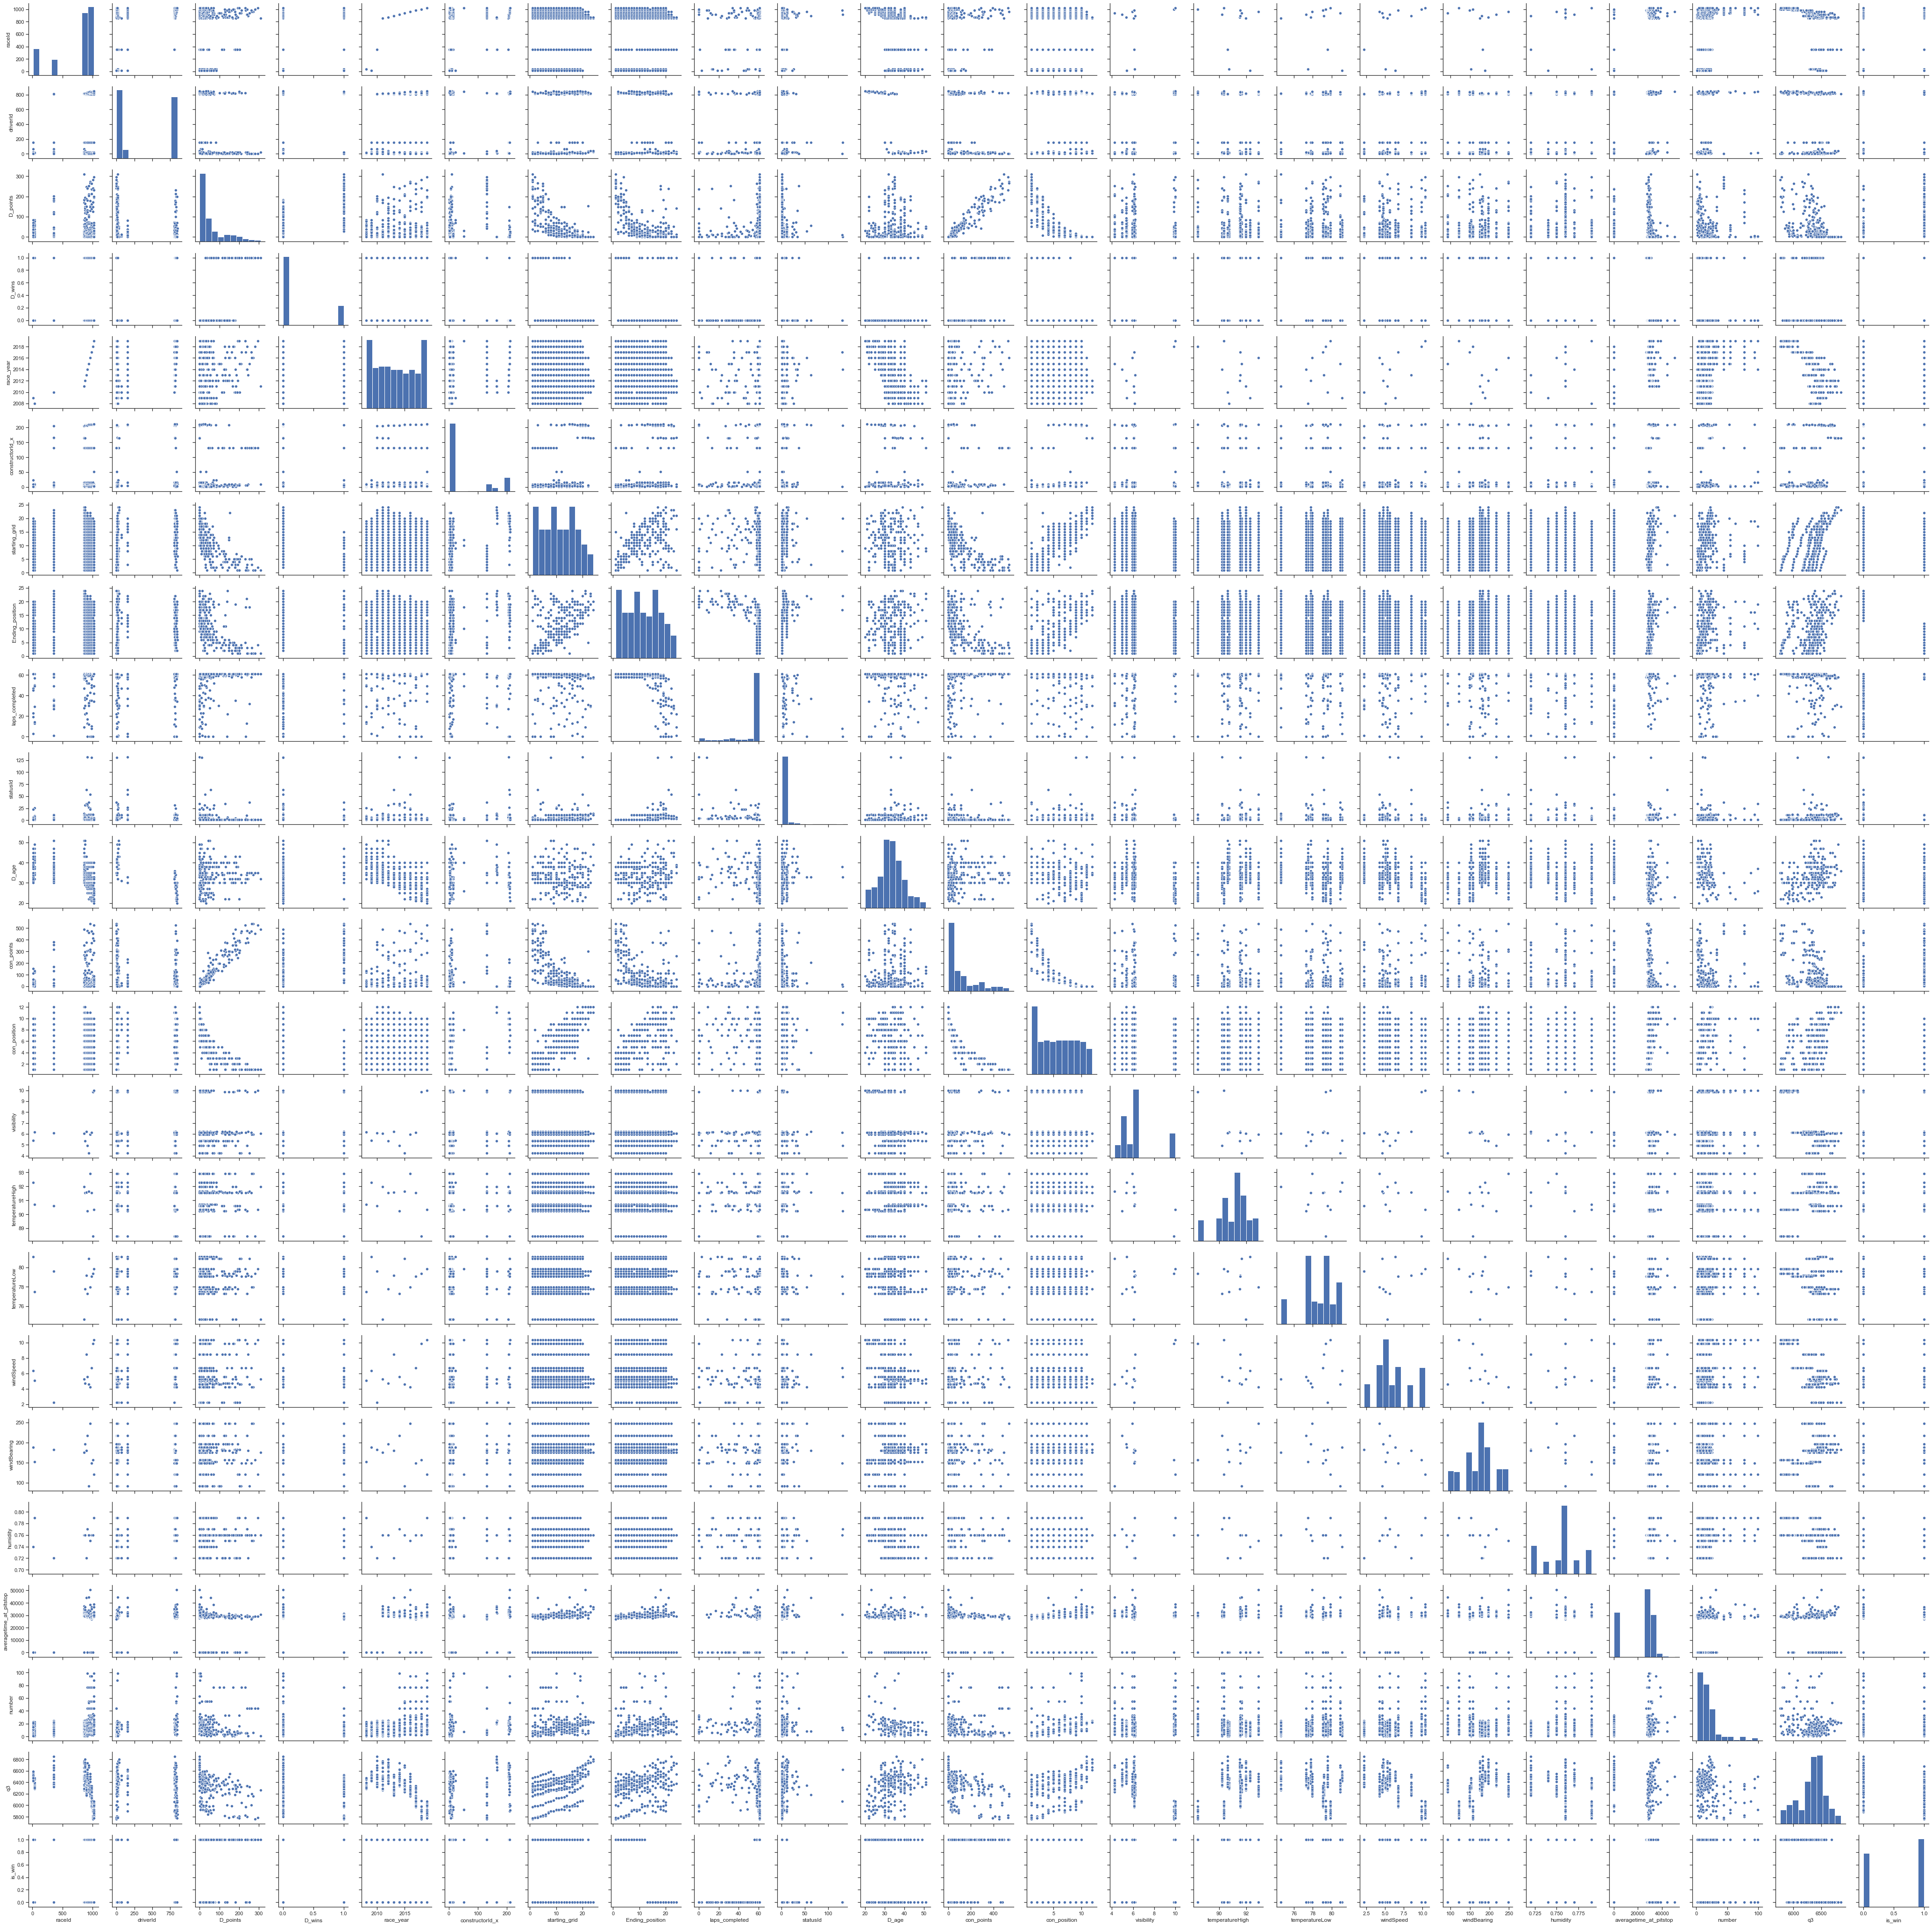

In [54]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df_analysis)

### clustering wind speed versus laps completed

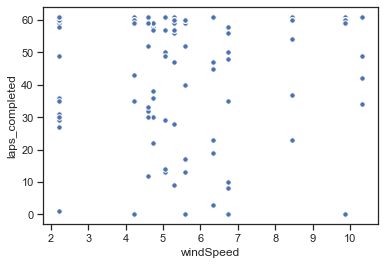

In [55]:
plt.figure()
plt.scatter(df_analysis['windSpeed'], df_analysis['laps_completed'], s=30,edgecolor='w')
plt.xlabel('windSpeed')
plt.ylabel('laps_completed')
plt.show();

### Making sure the df_analysis is only singapore race

In [56]:
df_races=pd.read_csv("./Capstone_core_data/races.csv")

In [57]:
df_races

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1035    1048  2020     18         22       Japanese Grand Prix  2020-10-11   
1036    1049  2020     19         69  United States Grand Prix  2020-10-25   
1037    1050  2020     20         32    Mexico City Grand Prix  2020-11-01   
1038    1051  2020     21         18      Brazilian Grand Prix  2020-11-15   
1039    1052  2020     22         24      Abu Dhabi Grand Prix  2020-11-29   

          time                                                url  
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...  
...        ...                                                ...  
1035  05:10:00  https://en.wikipedia.org/wiki/2020_Japanese_Gr...  
1036  19:10:00  https://en.wikipedia.org/wiki/2020_United_Stat...  
1037  19:10:00  https://en.wikipedia.org/wiki/2020_Mexican_Gra...  
1038  17:10:00  https://en.wikipedia.org/wiki/2020_Brazilian_G...  
1039        \N  https://en.wikipedia.org/wiki/2020_Abu_Dhabi_G...  

[1040 rows x 8 columns]

In [58]:
df_analysis_singapore=pd.merge(df_analysis,df_races,how='inner',on='raceId')

In [59]:
df_analysis_singapore=df_analysis_singapore.drop(['date','time','url'],axis=1)

In [60]:
df_analysis_singapore

raceId  driverId  D_points  D_wins  race_year  constructorId_x  \
0        32         1      84.0       1       2008                1   
1        32         5      51.0       1       2008                1   
2        32         2      56.0       0       2008                2   
3        32         9      64.0       1       2008                2   
4        32         3      17.0       0       2008                3   
..      ...       ...       ...     ...        ...              ...   
250    1024       842      69.0       0       2019                5   
251    1024       846      31.0       0       2019                1   
252    1024       832      58.0       0       2019                1   
253    1024       847       0.0       0       2019                3   
254    1024         9       1.0       0       2019                3   

     starting_grid  Ending_position  laps_completed  statusId  ...  \
0                2                3              61         1  ...   
1                5               10              61         1  ...   
2                9                6              61         1  ...   
3                4               11              61         1  ...   
4                8                2              61         1  ...   
..             ...              ...             ...       ...  ...   
250             11                8              61         1  ...   
251              9                7              61         1  ...   
252              7               12              61         1  ...   
253             18               20              34         4  ...   
254             19               16              61         1  ...   

     windBearing  humidity  averagetime_at_pitstop  number    q3  is_win  \
0          152.0      0.79                     0.0      22  6327       1   
1          152.0      0.79                     0.0      23  6352       1   
2          152.0      0.79                     0.0       3  6357       1   
3          152.0      0.79                     0.0       4  6346       1   
4          152.0      0.79                     0.0       7  6396       1   
..           ...       ...                     ...     ...   ...     ...   
250        121.0      0.79                 32482.0      10  5921       1   
251        121.0      0.79                 30397.0       4  5899       1   
252        121.0      0.79                 30623.0      55  5869       1   
253        121.0      0.79                 38752.0      63  6052       0   
254        121.0      0.79                 29677.0      88  6071       0   

     year  round  circuitId                  name  
0    2008     15         15  Singapore Grand Prix  
1    2008     15         15  Singapore Grand Prix  
2    2008     15         15  Singapore Grand Prix  
3    2008     15         15  Singapore Grand Prix  
4    2008     15         15  Singapore Grand Prix  
..    ...    ...        ...                   ...  
250  2019     15         15  Singapore Grand Prix  
251  2019     15         15  Singapore Grand Prix  
252  2019     15         15  Singapore Grand Prix  
253  2019     15         15  Singapore Grand Prix  
254  2019     15         15  Singapore Grand Prix  

[255 rows x 27 columns]

### Finding Average start grid for 66 drivers

In [61]:
df_analysis_start_grid_singapore=df_analysis.groupby(['driverId']).starting_grid.mean(
).reset_index().rename(columns={"starting_grid":"mean"})

In [62]:
df_analysis_start_grid_singapore=df_analysis_start_grid_singapore.sort_values(by='mean',ascending=True)

In [63]:
df_analysis_start_grid_singapore

driverId       mean
0          1   2.750000
49       830   4.000000
17        20   4.083333
2          3   5.111111
15        17   5.833333
..       ...        ...
40       820  21.500000
22        32  22.000000
36       816  22.000000
24        39  23.000000
23        37  24.000000

[66 rows x 2 columns]

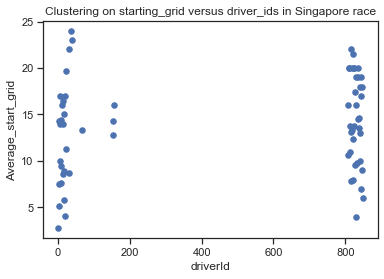

In [64]:
plt.figure()
plt.scatter(df_analysis_start_grid_singapore['driverId'], df_analysis_start_grid_singapore['mean'], s=30,edgecolor='b')
plt.title("Clustering on starting_grid versus driver_ids in Singapore race")
plt.xlabel('driverId')
plt.ylabel('Average_start_grid')
plt.show();

### Finding the driver points across years for drivers

In [65]:
df_analysis_cumulative_points_singapore=df_analysis.groupby(['driverId']).D_points.sum().reset_index().rename(columns={"D_points":"Total_points_across_years"})


In [66]:
df_analysis_cumulative_points_singapore=df_analysis_cumulative_points_singapore.sort_values(by='Total_points_across_years',ascending=False)

In [67]:
df_analysis_cumulative_points_singapore.shape

(66, 2)

In [68]:
df_drivers=pd.read_csv('./Capstone_core_data/drivers.csv')

In [69]:
df_driver_points=pd.merge(df_analysis_cumulative_points_singapore,df_drivers,how='inner',on='driverId')

In [70]:
df_driver_points.columns

Index(['driverId', 'Total_points_across_years', 'driverRef', 'number', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url'],
      dtype='object')

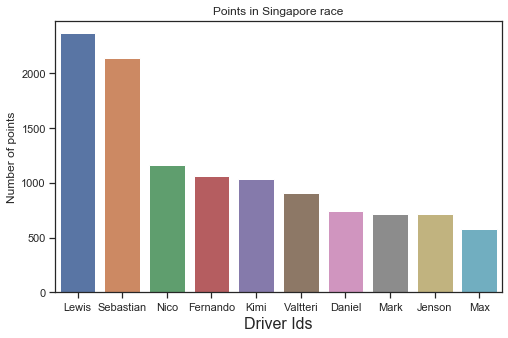

In [71]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(df_driver_points.forename.head(10), df_driver_points.Total_points_across_years.head(10), alpha=1)
plt.title('Points in Singapore race')
plt.ylabel('Number of points', fontsize=12)
plt.xlabel('Driver Ids', fontsize=16)
plt.show()

### Clustering the total points in singapore races versus drivers


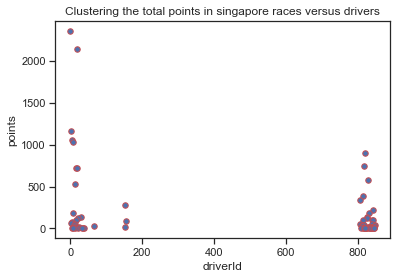

In [72]:
plt.figure()
plt.scatter(df_analysis_cumulative_points_singapore['driverId'], df_analysis_cumulative_points_singapore['Total_points_across_years'], s=30,edgecolor='r')
plt.title("Clustering the total points in singapore races versus drivers")
plt.xlabel('driverId')
plt.ylabel('points')
plt.show();

### Merging start grid with points to see the clustering

In [73]:
df_cumulative=pd.merge(df_analysis_start_grid_singapore,df_driver_points,how='inner',on='driverId')

In [74]:
df_cumulative=df_cumulative[['driverId','mean','Total_points_across_years','forename','surname']]

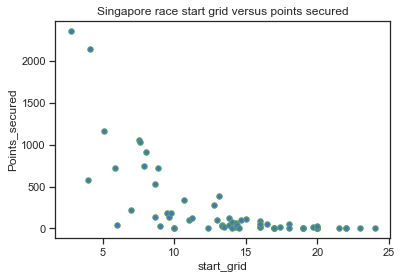

In [75]:
plt.figure()
plt.scatter(df_cumulative['mean'], df_cumulative['Total_points_across_years'], s=30,edgecolor='g')
plt.title("Singapore race start grid versus points secured")
plt.xlabel('start_grid')
plt.ylabel('Points_secured')
plt.show();

### Findings:
   ### Drivers who has started in less than 10 position would likely to score high points.

### Finding the driver average pit stop time across racess  over the years(only in singapore season)

In [76]:
df_analysis_averagepit_singapore=df_analysis.groupby(['driverId']).averagetime_at_pitstop.mean().reset_index().rename(columns={"averagetime_at_pitstop":"mean_time_pitstop_across_years"})


In [77]:
df_analysis_averagepit_singapore=df_analysis_averagepit_singapore.sort_values(by='mean_time_pitstop_across_years',ascending=False)

In [78]:
df_analysis_average_pitstop=pd.merge(df_analysis_averagepit_singapore,df_drivers,how='inner',on='driverId')

In [79]:

pd.options.display.max_rows=66
df_analysis_average_pitstop=df_analysis_average_pitstop[['driverId','mean_time_pitstop_across_years','forename','surname']]

### clustering approach to see the correleation beteen pit stop time and ending position

In [80]:
df_cummulative1=pd.merge(df_driver_points,df_analysis_average_pitstop,how='inner',on='driverId')

In [81]:
df_cummulative1=df_cummulative1.sort_values(by='Total_points_across_years',ascending=False)

In [82]:
df_cummulative1=df_cummulative1[['driverId','Total_points_across_years','mean_time_pitstop_across_years','forename_y','surname_y']]

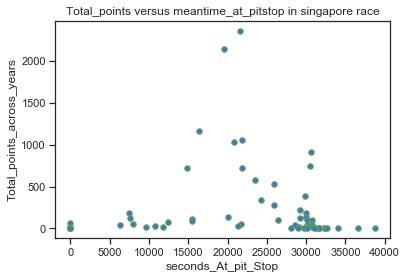

In [83]:
plt.figure()
plt.scatter(df_cummulative1['mean_time_pitstop_across_years'], df_cummulative1['Total_points_across_years'], s=30,edgecolor='g')
plt.title("Total_points versus meantime_at_pitstop in singapore race")
plt.xlabel('seconds_At_pit_Stop')
plt.ylabel('Total_points_across_years')
plt.show();

### Findings:
    1.Drivers who stopped on an average less than 25000 seconds were able to reach the ending position faster and secure high points.

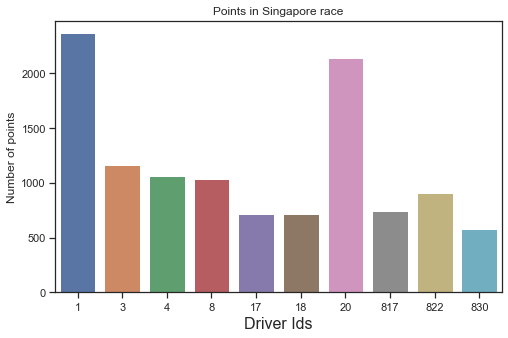

In [84]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(df_analysis_cumulative_points_singapore.driverId.head(10), df_analysis_cumulative_points_singapore.Total_points_across_years, alpha=1)
plt.title('Points in Singapore race')
plt.ylabel('Number of points', fontsize=12)
plt.xlabel('Driver Ids', fontsize=16)
plt.show()

In [85]:
df_cummulative1=df_cummulative1[['driverId','Total_points_across_years','mean_time_pitstop_across_years']]

In [86]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 3)
#Fit the model to the data
k_means_model.fit(df_cummulative1);

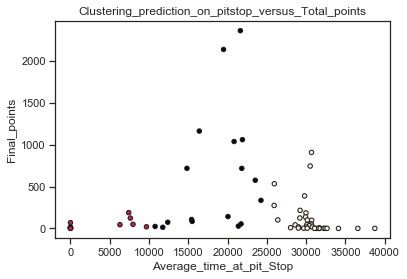

In [87]:
#Annotate the data points with the K-Means prediction
pred_labels = k_means_model.predict(df_cummulative1)
# OR equivalently, the labels are stored within labels_ 
pred_labels = k_means_model.labels_
#Plot the data:
plt.figure()
plt.scatter(df_cummulative1['mean_time_pitstop_across_years'], df_cummulative1['Total_points_across_years'], c=pred_labels, s=20, edgecolor='k')
plt.title('Clustering_prediction_on_pitstop_versus_Total_points')
plt.xlabel('Average_time_at_pit_Stop')
plt.ylabel('Final_points')
plt.show();

In [88]:
print(f'The fit score (inertia) is:{k_means_model.inertia_}')

The fit score (inertia) is:718803626.1827517


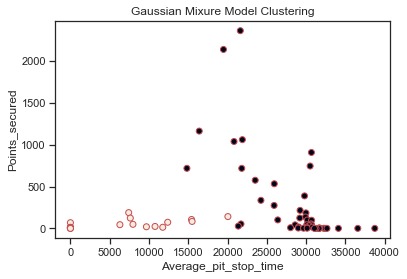

In [89]:
from sklearn.mixture import GaussianMixture

#Build and fit the model
my_gmm = GaussianMixture(n_components=2, covariance_type='full')
my_gmm.fit(df_cummulative1)

#Getting the labels
pred_labels_gmm = my_gmm.predict(df_cummulative1)

#Plot the predictions
plt.figure()
plt.scatter(df_cummulative1['mean_time_pitstop_across_years'], df_cummulative1['Total_points_across_years'], c=pred_labels_gmm, edgecolor='r')
plt.title("Gaussian Mixure Model Clustering")
plt.xlabel('Average_pit_stop_time')
plt.ylabel('Points_secured')
plt.show();

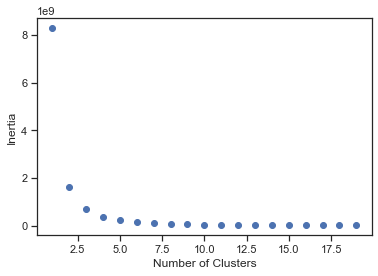

In [90]:
k_range = np.arange(1,20)

inertia_list = []

for k in k_range :
    
    #Specify the model
    k_means_model = KMeans(n_clusters = k)
    k_means_model.fit(df_cummulative1)
    
    inertia_list.append(k_means_model.inertia_)
    
plt.figure()
plt.scatter(k_range,inertia_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show();

### Clustering between drivers and their age

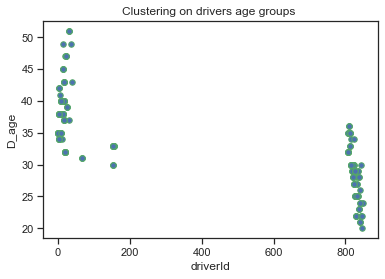

In [91]:
plt.figure()
plt.scatter(df_analysis['driverId'], df_analysis['D_age'], s=30,edgecolor='g')
plt.title("Clustering on drivers age groups ")
plt.xlabel('driverId')
plt.ylabel('D_age')
plt.show();

### Clustering between drivers and their points

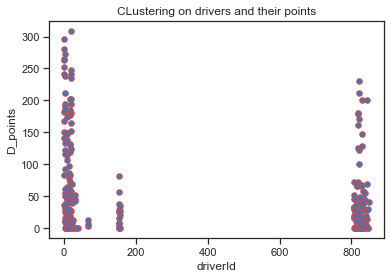

In [92]:
plt.figure()
plt.scatter(df_analysis['driverId'], df_analysis['D_points'], s=30,edgecolor='r')
plt.title("CLustering on drivers and their points")
plt.xlabel('driverId')
plt.ylabel('D_points')
plt.show();

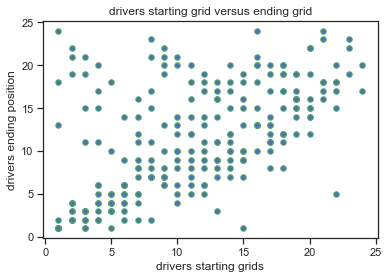

In [93]:
plt.figure()
plt.scatter(df_analysis['starting_grid'], df_analysis['Ending_position'], s=30,edgecolor='g')
plt.title("drivers starting grid versus ending grid")
plt.xlabel('drivers starting grids')
plt.ylabel('drivers ending position')
plt.show();

In [94]:
import plotly.graph_objects as go

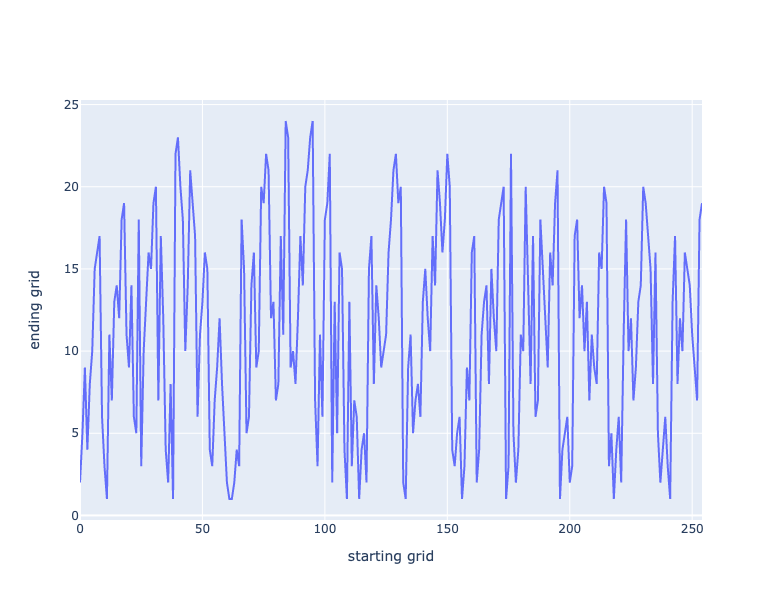

In [95]:
# Create line graphs of the total bill amount and tip amount (in $)
line_data1 = go.Scatter(y = df_analysis['starting_grid'], name="starting_grid",mode='lines')
line_data2 = go.Scatter(y = df_analysis['Ending_position'], name="Ending_position")

# Create a figure and plot against the order #
fig = go.Figure(
    data=[line_data1],
    layout=go.Layout(width=1000,height=600, xaxis_title='starting grid', yaxis_title='ending grid'))
fig.show()

In [96]:
#df_analysis=df_analysis[['driverId', 'D_points', 'D_wins', 
    #   'starting_grid', 'Ending_position',
    #   'laps_completed', 'D_age', 
    #   'averagetime_at_pitstop', 
    #   'q3','is_win']]

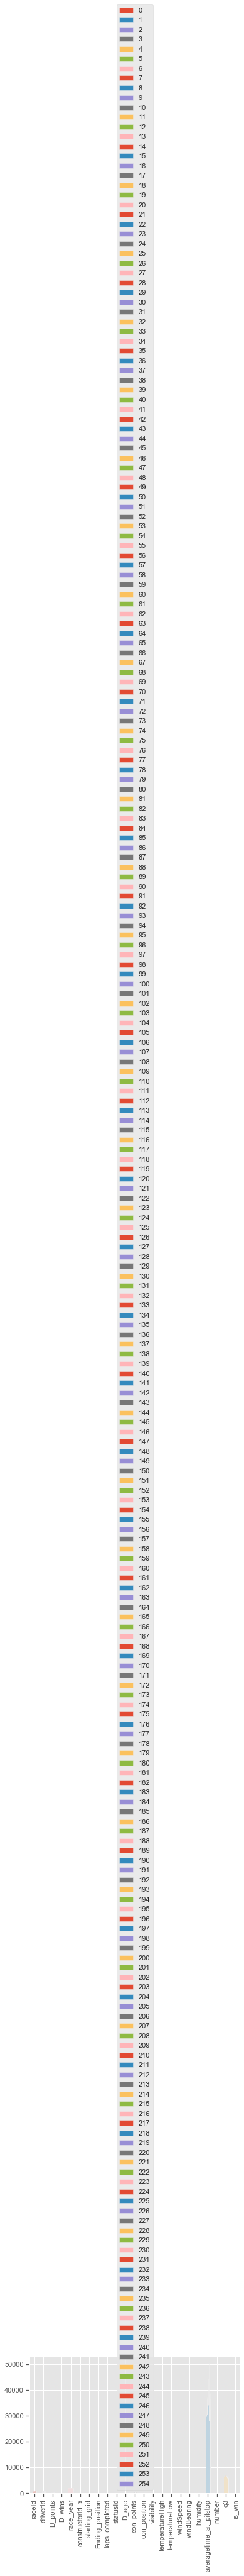

In [97]:
plt.style.use('ggplot')
df_analysis.T.plot(kind='bar')

In [98]:
df_analysis['is_win'] = np.where(df_analysis.Ending_position <=10,1,0)

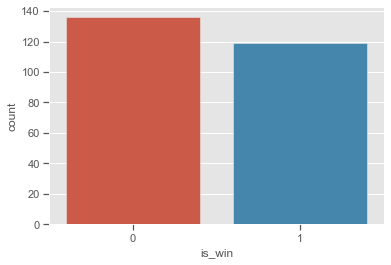

In [99]:
import seaborn as sns
sns.countplot(df_analysis['is_win'])

In [100]:
df_analysis.head(2)

raceId  driverId  D_points  D_wins  race_year  constructorId_x  \
0      32         1      84.0       1       2008                1   
1      32         5      51.0       1       2008                1   

   starting_grid  Ending_position  laps_completed  statusId  ...  visibility  \
0              2                3              61         1  ...       6.167   
1              5               10              61         1  ...       6.167   

   temperatureHigh  temperatureLow  windSpeed  windBearing  humidity  \
0            90.72           77.47       5.06        152.0      0.79   
1            90.72           77.47       5.06        152.0      0.79   

   averagetime_at_pitstop  number    q3  is_win  
0                     0.0      22  6327       1  
1                     0.0      23  6352       1  

[2 rows x 23 columns]

---
---